In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

- 1460 rows and 81 columns.

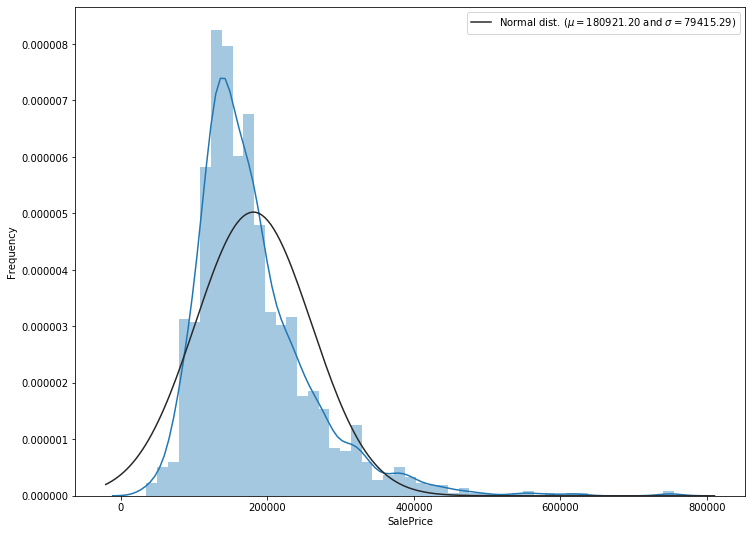

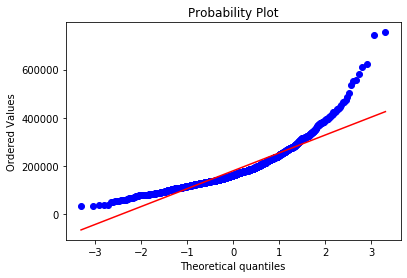

In [5]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu = ${:.2f} and $\sigma = ${:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')

# Probability plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

- The black curve shows how can our dependent variable be normally distributed and blue color curve is the original distribution of the dependent variable (SalePrice)
- Red line in the QQ plot is the standard normal distribution
- Blue dots are the actual distribution of our variable

Text(0, 0.5, 'Frequency')

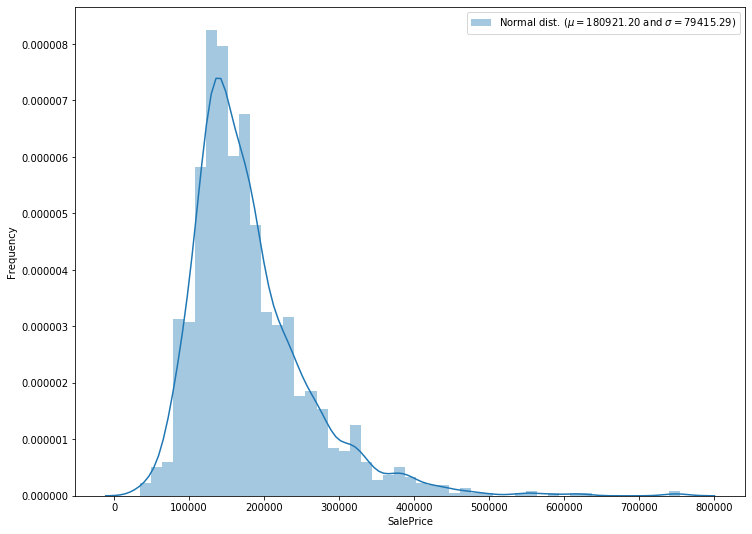

In [6]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'])

# get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu = ${:.2f} and $\sigma = ${:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')

- The target variable is right skewed thus we have to make it to normal distribution by applying log transformation

- Use of log function is the most common way to make a more normal distribution

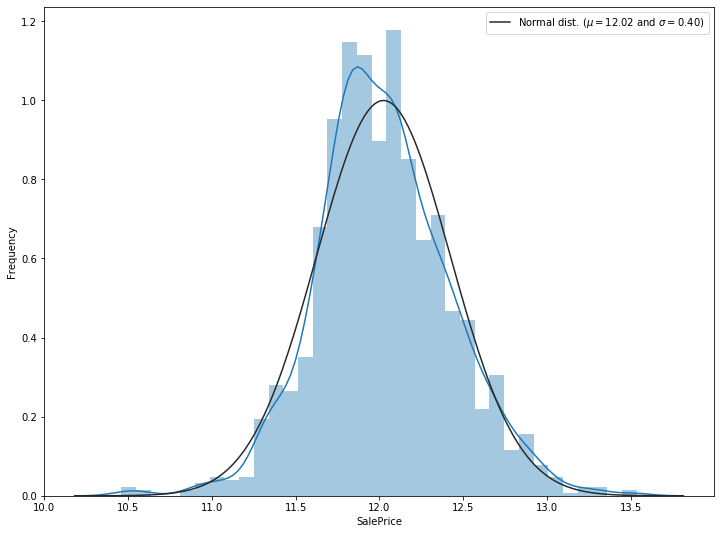

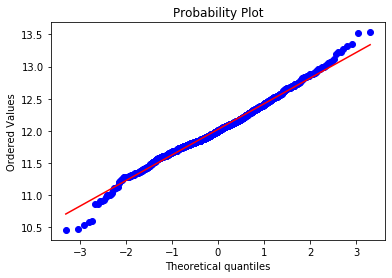

In [7]:
train['SalePrice'] = np.log1p(train['SalePrice'])

# check agin for normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plot with the distribution
plt.legend(['Normal dist. ($\mu = ${:.2f} and $\sigma = ${:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')

# Probability plot
fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

- From the distribution curve we can see that after tranforming the dependent variable to logarithmic the distribution comes very close the normal distribution
- And from probability curve also we can see that the blue dots are almost lying on the red line

### Checking for null values -

In [8]:
train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

Since it gives the boolean array and that is what i will pass inside the columns to filter out the columns having null values.(whereever it is True)

In [9]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

### Plot of missing value attributes-

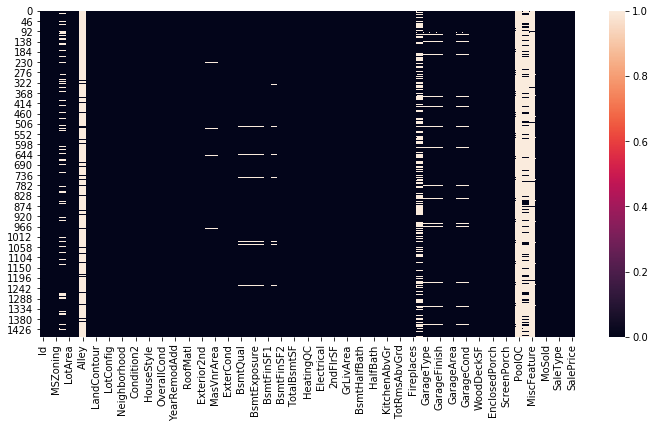

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isna())
plt.show()

### missing value percentage -

In [12]:
null = train.isnull().sum()/len(train)*100
null = null[null>0]
null.sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [13]:
null.sort_values(ascending=False, inplace=True)

In [14]:
null = null.to_frame()

In [15]:
null.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

In [16]:
null.columns = ['count (in %)']

In [17]:
null

,count (in %)
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


In [18]:
null.index.names = ['Name']

In [19]:
null

,count (in %)
Name,
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945


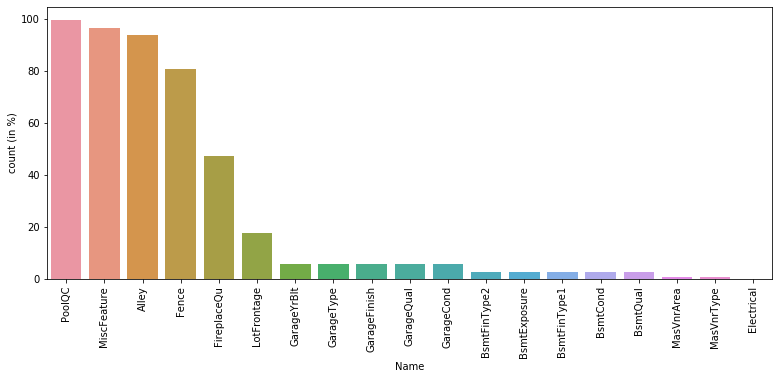

In [20]:
plt.figure(figsize=(13,5))
sns.barplot(x=null.index, y='count (in %)', data=null)
plt.xticks(rotation=90)
plt.show()

### Corelation between train attributes -

In [21]:
# seperate data which has only numeric values 

train_corr = train.select_dtypes(include=np.number)

In [22]:
train_corr.shape

(1460, 38)

In [23]:
del train_corr['Id']

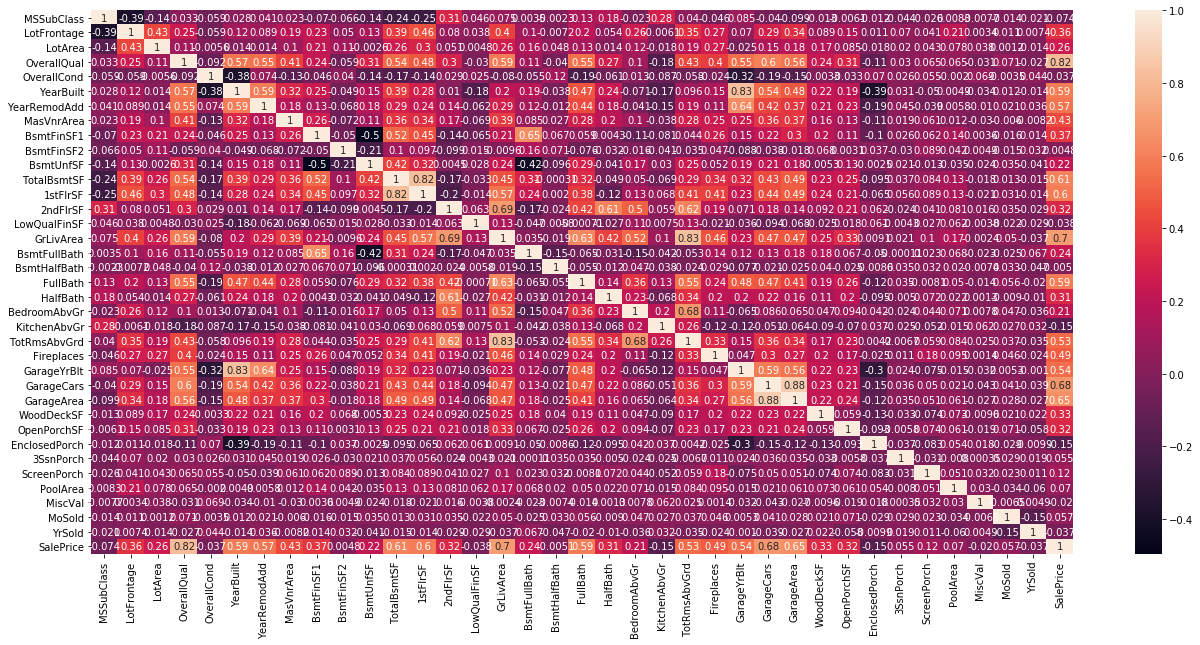

In [24]:
corr = train_corr.corr()
plt.subplots(figsize=(22,10))
sns.heatmap(corr, annot=True)

In [25]:
corr.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
top_feature = corr.index[abs(corr['SalePrice']>0.5)]

- In this we are finding all that variables which has corelation of more than 50% with the SalePrice.

In [27]:
top_feature

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [28]:
corr[corr['SalePrice']>0.5]['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
TotRmsAbvGrd    0.534422
Name: SalePrice, dtype: float64

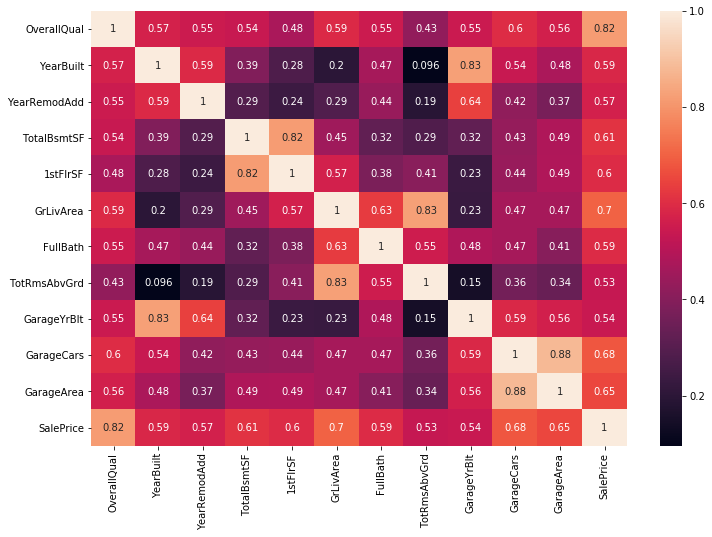

In [29]:
plt.subplots(figsize=(12,8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

- OverallQual is highly corelated with SalePrice and has a corelation coefficient of 0.817

In [30]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

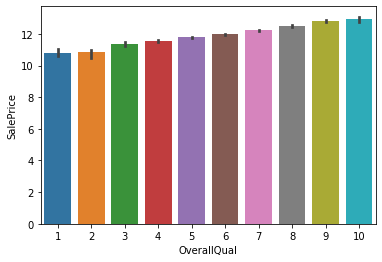

In [31]:
sns.barplot(train.OverallQual, train.SalePrice)

- With this graph we can say that as the Overall Quality of a house increases its price will increase

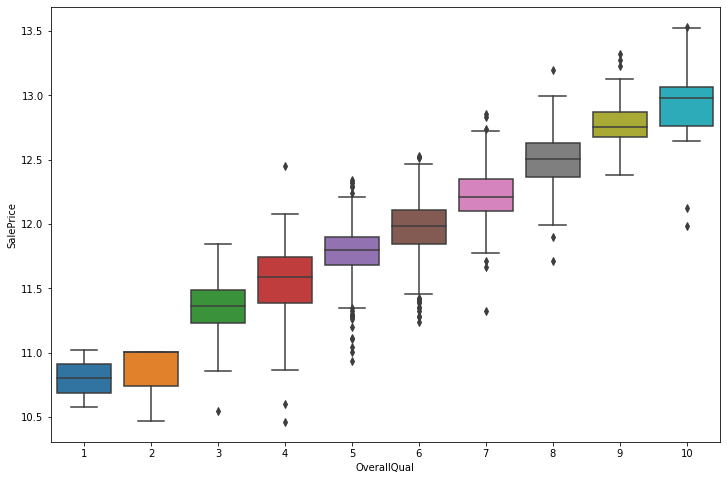

In [32]:
plt.subplots(figsize=(12,8))
sns.boxplot(train.OverallQual, train.SalePrice)

- With this boxplot we can see that the medians of the different OverallQual are varying, thus we can say that OverallQual has a high impact on the SalePrice.

In [34]:
col = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']

C:\Users\SALMAN\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


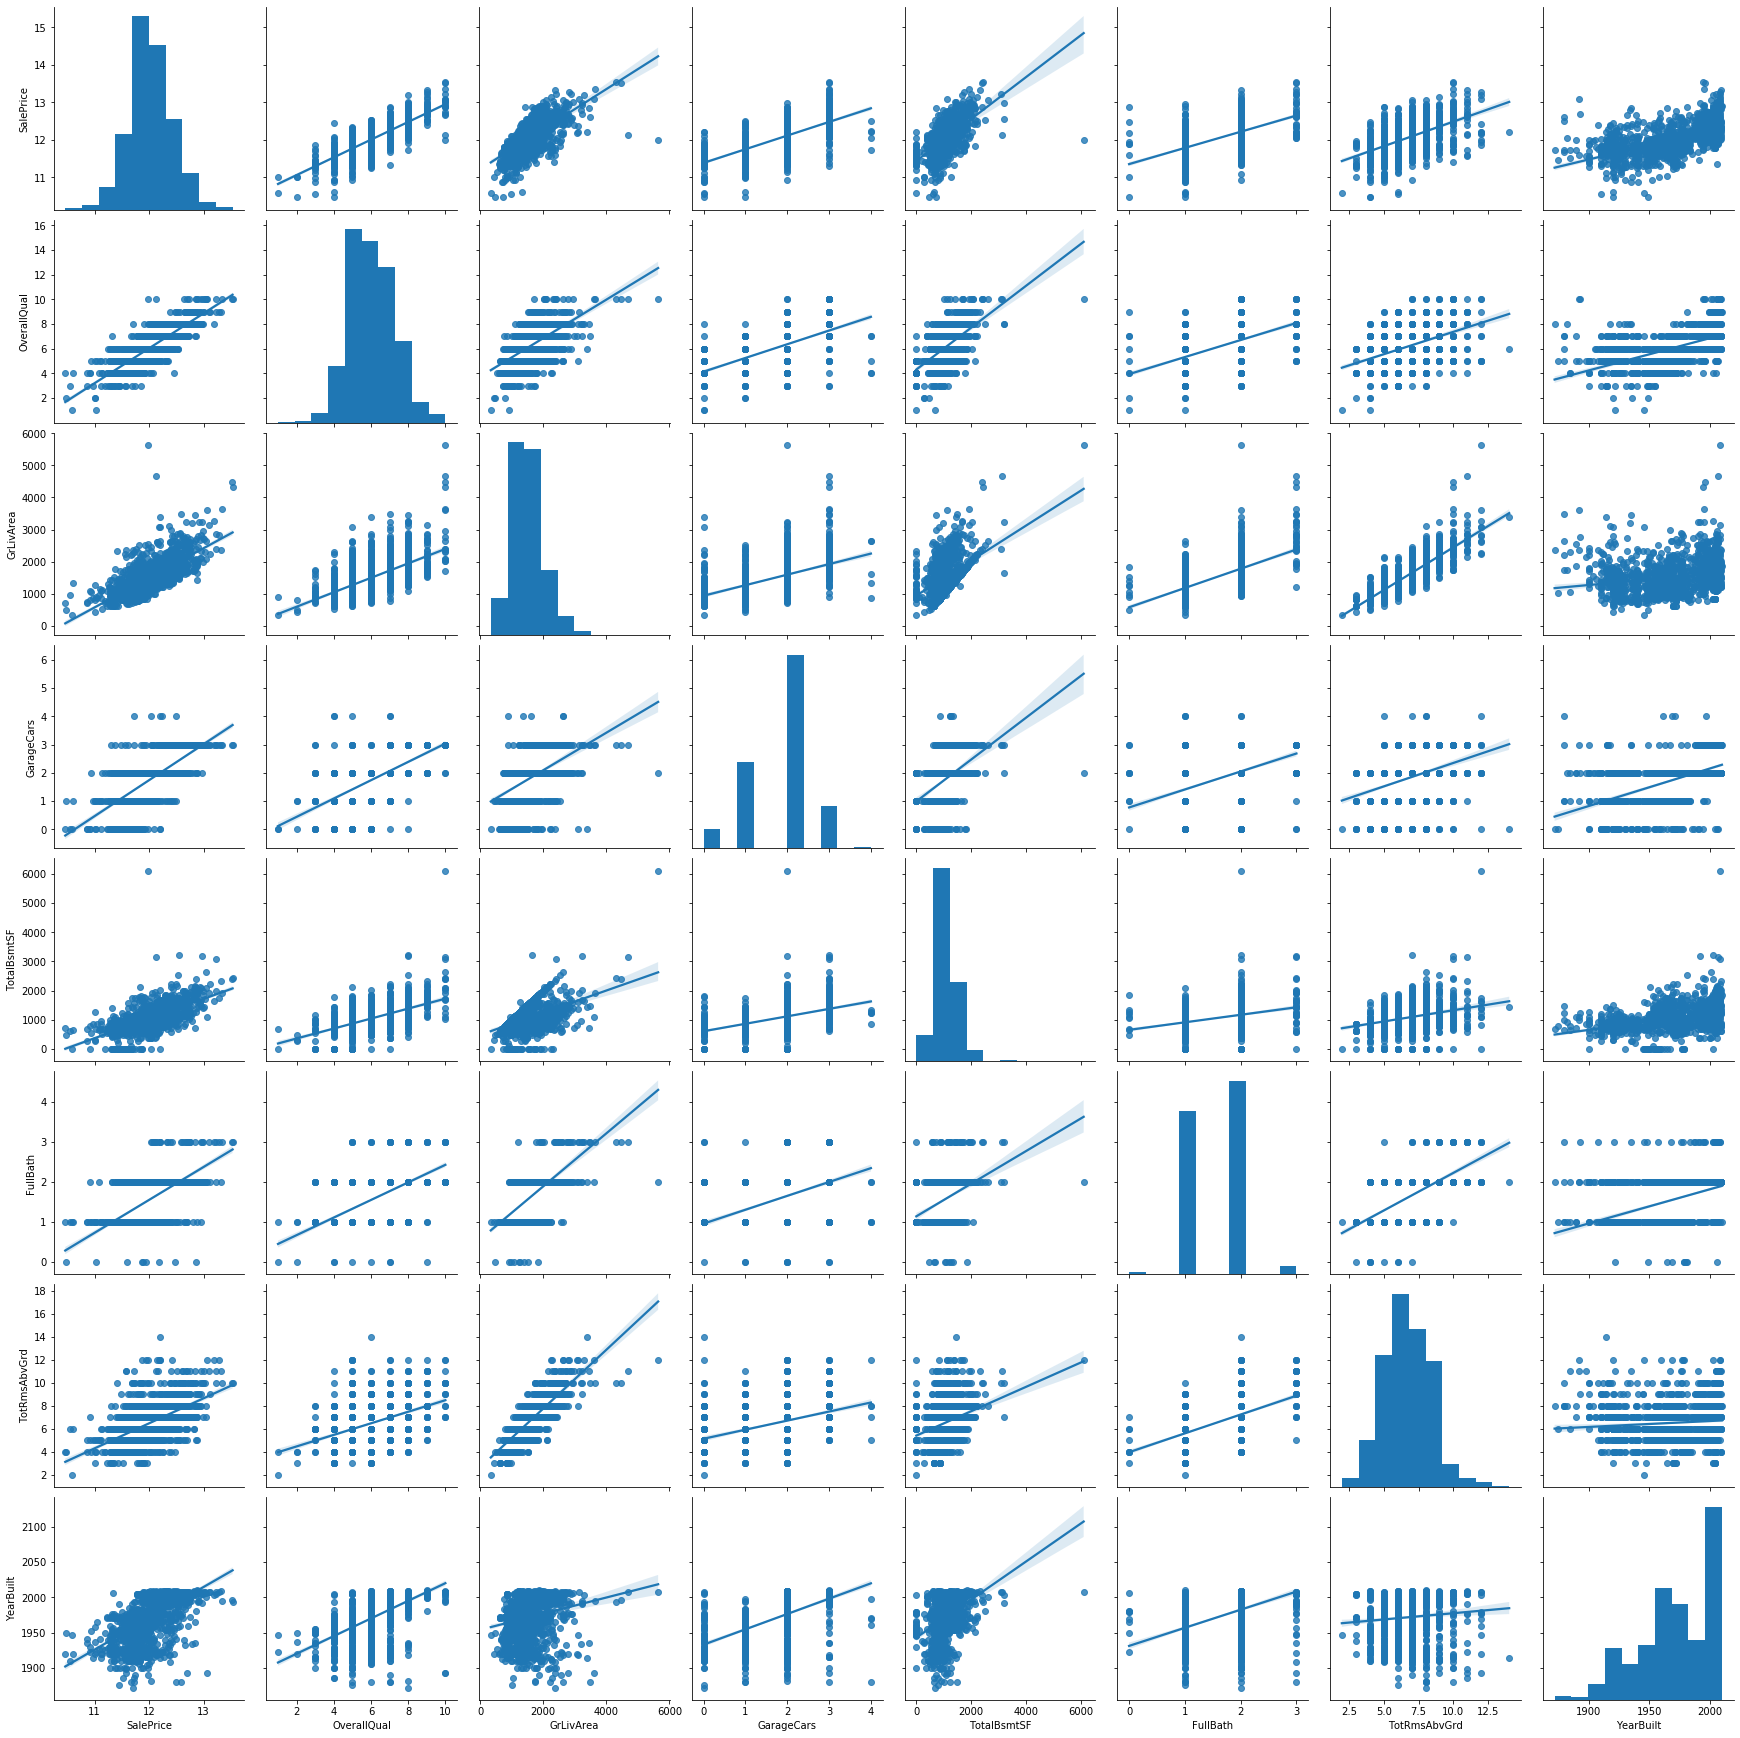

In [33]:
sns.pairplot(train[col], size=3, kind='reg')

In [35]:
train[col].SalePrice.describe()

count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

In [36]:
print('Find the most important features relative to the target')
corr = train.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

Find the most important features relative to the target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

### Inputing missing values -

In [37]:
null

,count (in %)
Name,
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945


- PoolQc has 99.52% of null values, so there we will fill None 

In [38]:
train['PoolQC'] = train.PoolQC.fillna('None')

In [39]:
train.PoolQC.value_counts()

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

#### for features having more than 50% missing values again we will fill with None

In [40]:
train['Alley'] = train.Alley.fillna('None')

In [41]:
train['Fence'] = train.Fence.fillna('None')

In [42]:
train['FireplaceQu'] = train.FireplaceQu.fillna('None')

In [43]:
train['MiscFeature'] = train.MiscFeature.fillna('None')

In [44]:
train.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
               ... 
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Id                0
Length: 81, dtype: int64

In [45]:
# Groupby neighbourhood and fill in missing value by the median LotFrontage of all neighbourhood

In [46]:
train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [47]:
train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [48]:
train.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [49]:
train.groupby('Neighborhood')['LotFrontage'] # this will become x

In [50]:
train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [51]:
# OR
train.groupby('Neighborhood')['LotFrontage'].fillna(train.groupby('Neighborhood')['LotFrontage'].median())

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [52]:
train.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [53]:
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [54]:
# we will fill nan values in garagetype garagefinish garagequal and garagecond with none

In [55]:
for col in ['GarageType','GarageFinish','GarageCond','GarageQual']:
    train[col] = train[col].fillna('None')

In [56]:
# GarageYrBlt, GarageArea, GarageCars with 0

In [57]:
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna('None')

In [58]:
for col in ['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']:
    train[col] = train[col].fillna('None')

In [59]:
train['MasVnrArea'] = train.MasVnrArea.fillna(0)

In [60]:
train['MasVnrType'] = train.MasVnrType.fillna('None')

In [61]:
train['Electrical'].mode()

0    SBrkr
dtype: object

In [62]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

In [63]:
train['Electrical'].value_counts(dropna=False)

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [64]:
train.drop(columns=['Utilities'], inplace=True)

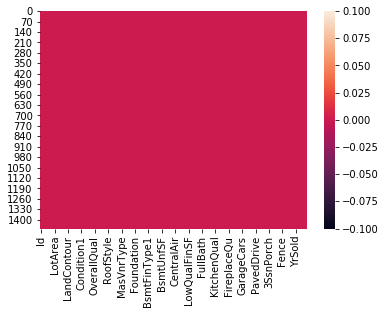

In [65]:
# Now check if there is any null values are remaining
sns.heatmap(train.isnull())

### Categorical variables -

In [66]:
train_cat = train.select_dtypes(include='object').columns

In [67]:
train_cat

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
for c in train_cat:
    lbl = LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c] = lbl.transform(list(train[c].values))

- With this we have converted all the categorical variables into numeric

In [70]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,4,...,0,3,4,1,0,2,2008,8,4,12.247699
1,2,20,3,80.0,9600,1,1,3,3,2,...,0,3,4,1,0,5,2007,8,4,12.109016
2,3,60,3,68.0,11250,1,1,0,3,4,...,0,3,4,1,0,9,2008,8,4,12.317171
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,11.849405
4,5,60,3,84.0,14260,1,1,0,3,2,...,0,3,4,1,0,12,2008,8,4,12.429220


## Model building -

In [71]:
y = train['SalePrice']

In [72]:
del train['SalePrice']

In [73]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,1,3,3,4,...,0,0,3,4,1,0,2,2008,8,4
1,2,20,3,80.0,9600,1,1,3,3,2,...,0,0,3,4,1,0,5,2007,8,4
2,3,60,3,68.0,11250,1,1,0,3,4,...,0,0,3,4,1,0,9,2008,8,4
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,0,3,4,1,0,2,2006,8,0
4,5,60,3,84.0,14260,1,1,0,3,2,...,0,0,3,4,1,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,4,...,0,0,3,4,1,0,8,2007,8,4
1456,1457,20,3,85.0,13175,1,1,3,3,4,...,0,0,3,2,1,0,2,2010,8,4
1457,1458,70,3,66.0,9042,1,1,3,3,4,...,0,0,3,0,3,2500,5,2010,8,4
1458,1459,20,3,68.0,9717,1,1,3,3,4,...,0,0,3,4,1,0,4,2010,8,4


In [74]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [75]:
X = train

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [78]:
# perform linear regression

from sklearn.linear_model import LinearRegression

In [79]:
model = LinearRegression()

In [80]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
# score/accuracy

print('Accuracy on train data :', model.score(X_train, y_train)*100)

Accuracy on train data : 88.28535578336127


In [86]:
ypred = model.predict(X_test)

In [88]:
print('Accuracy on test data :', model.score(X_test, y_test)*100)

Accuracy on test data : 89.18450564186514


Text(0, 0.5, 'Proportion of price')

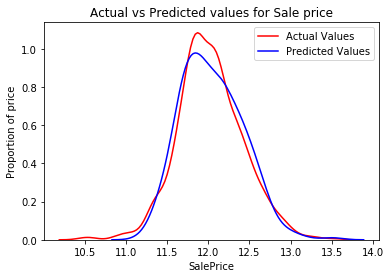

In [89]:
ax1 = sns.distplot(y, hist=False, color='r', label='Actual Values')
sns.distplot(ypred, hist=False, color='b', label='Predicted Values', ax=ax1)
plt.title('Actual vs Predicted values for Sale price')
plt.ylabel('Proportion of price')

In [90]:
len(y)

1460

In [91]:
len(ypred)

292

Text(0, 0.5, 'Sale Price')

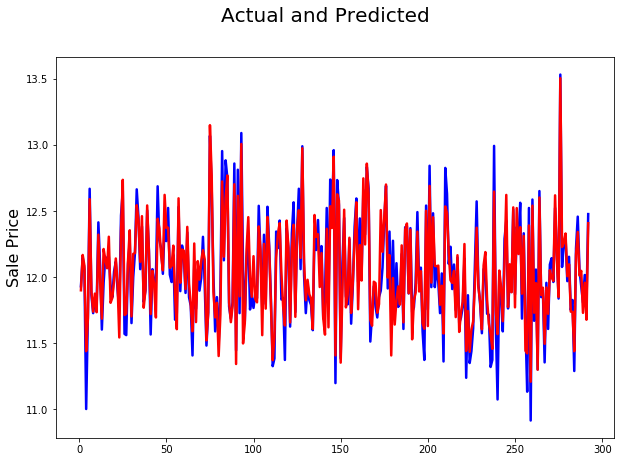

In [92]:
c = [i for i in range(1,293)]
fig = plt.figure(figsize=(10,7))
plt.plot(c,y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c,ypred, color='red', linewidth=2.5, linestyle='-')
fig.suptitle('Actual and Predicted', fontsize=20)
plt.ylabel('Sale Price', fontsize=16)

In [93]:
l=list(y_test-ypred)

In [94]:
l[100]

0.042030608961429294

Text(0, 0.5, 'Actual - Predicted')

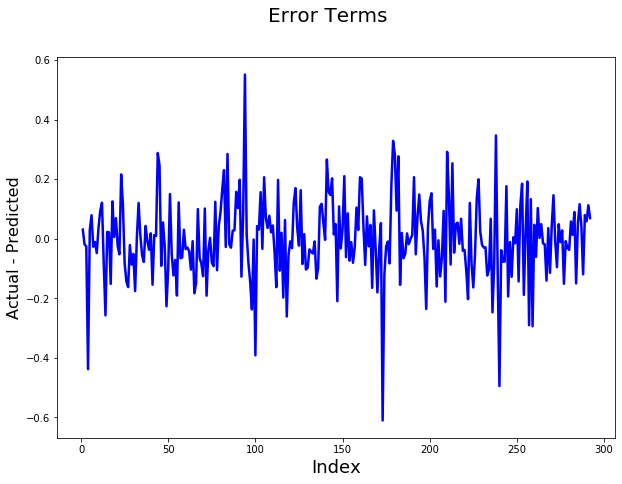

In [95]:
# Error terms

c = [i for i in range(1,293)]
fig = plt.figure(figsize=(10,7))
plt.plot(c,y_test-ypred, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Actual - Predicted', fontsize=16)

- The sudden spikes in the graph shows that there is big difference between actual and predicted price.

In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [97]:
mse = mean_squared_error(y_test,ypred)
r_square = r2_score(y_test,ypred)

In [98]:
print('Mean square error :',mse)
print('Root mean square error :',np.sqrt(mse))
print('R_square_value :',r_square)

Mean square error : 0.018123630382324434
Root mean square error : 0.13462403344991725
R_square_value : 0.8918450564186514


In [99]:
X_train.shape

(1168, 79)

In [100]:
y_train.shape

(1168,)

## Polynomial transformation -

In [103]:
from sklearn.preprocessing import PolynomialFeatures

In [104]:
pr = PolynomialFeatures(degree=2)

In [105]:
x_pr = pr.fit_transform(X_train)

In [106]:
model_pr = model.fit(x_pr, y_train)

In [107]:
x_pr_test = pr.fit_transform(X_test)

In [108]:
ypred_pr = model.predict(x_pr_test)

Text(0, 0.5, 'Proportion of price')

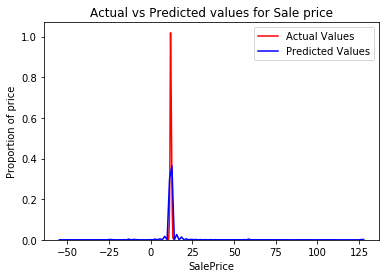

In [109]:
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Values')
sns.distplot(ypred_pr, hist=False, color='b', label='Predicted Values', ax=ax1)
plt.title('Actual vs Predicted values for Sale price')
plt.ylabel('Proportion of price')

In [113]:
r2_score(y_test, ypred_pr)

-467.07599220420775

- From this we can conclude that polynomial transformation is not that effective for our model. As it is giving negtive R2-score , that means this model is worst than the base line(mean) model.

### Cross validation -

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
Rcross = cross_val_score(model, X, y, cv=4)

In [117]:
Rcross

array([0.90225148, 0.86243053, 0.87587881, 0.76400123])

In [118]:
Rcross.mean()

0.8511405118532285

- The mean R2 score after cross-validation is 0.8511 which is good